In [16]:
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import seaborn as sn

register_matplotlib_converters()
%matplotlib inline
pd.set_option('precision', 3)
pd.options.display.float_format = '{:.2f}'.format

In [17]:
df3 = pd.read_csv('/home/gibbs/SJIs/VacationRentals/Data/VacationRentalPermits-ApprDate_20190515.csv',header=0)

In [18]:
dates =  []
for val in df3['Approval_Date']:
    date = dt.datetime.strptime(val, '%Y-%m-%d')
    dates.append(date)
df3['date'] = dates

df3['index'] = df3.index.values

In [19]:
df4 = df3.loc[df3['index'] > 100]

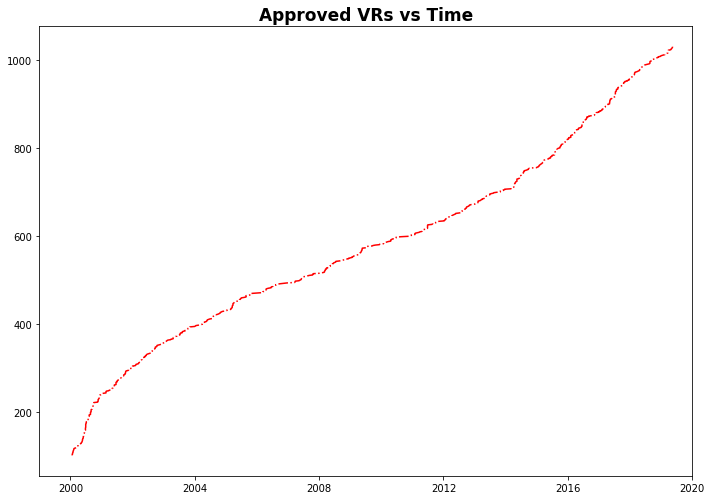

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax.set_xlim([dt.date(1999, 1, 1), dt.date(2020, 1, 1)])

years = mdates.YearLocator(4)
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

plt.title('Approved VRs vs Time',fontweight='bold', fontsize='17')
plt.plot_date(df4['date'], df4['index'], fmt='-.r', tz=None, xdate=True, ydate=False)

#plt.ylabel('Number of Approved VRs', fontweight='bold', fontsize='17', horizontalalignment='center', labelpad=20)

In [21]:
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

In [23]:
xvals = []
yvals = []
for row in df4.itertuples():
    if row.date > dt.datetime(2000, 1, 1):
        xvals.append(row.date)
        yvals.append(row.Index)
xdays1 = mdates.date2num(xvals)
z1 = np.polyfit(xdays1, yvals, 1)
p1 = np.poly1d(z1)
results1 = polyfit(xdays1, yvals, 1)

xvals = []
yvals = []
for row in df4.itertuples():
    if row.date > dt.datetime(2010, 1, 1):
        xvals.append(row.date)
        yvals.append(row.Index)
xdays2 = mdates.date2num(xvals)
z2 = np.polyfit(xdays2, yvals, 1)
p2 = np.poly1d(z2)
results2 = polyfit(xdays2, yvals, 1)


z3 = np.polyfit(xdays2, yvals, 2)
p3 = np.poly1d(z3)
results3 = polyfit(xdays2, yvals, 2)

In [24]:
print(results1)
print(results2)
print(results3)

{'polynomial': [0.11145313752677417, -81186.97279228132], 'determination': 0.9811198122096878}
{'polynomial': [0.14214100774904614, -103775.18350566564], 'determination': 0.9766322053156271}
{'polynomial': [2.2541088180738583e-05, -33.0193656245309, 12092661.37261974], 'determination': 0.9964732344736281}


In [7]:
extt = mdates.date2num(pd.date_range(start='1/1/2020', end='1/01/2036', freq='Y'))

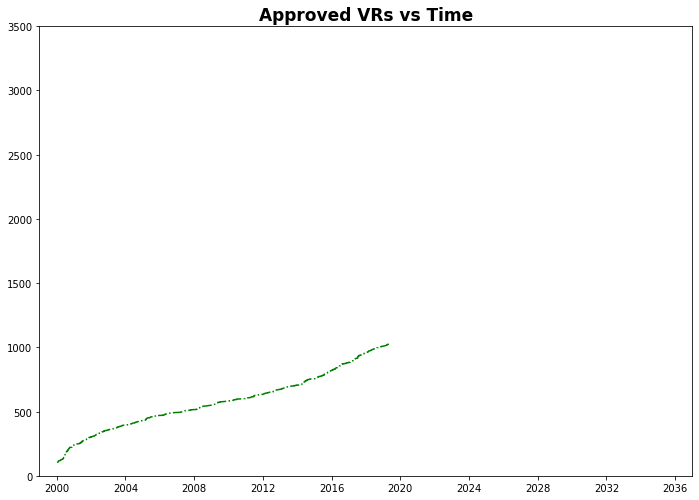

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax.set_xlim([dt.date(1999, 1, 1), dt.date(2036, 12, 31)])
ax.set_ylim(0,3500)

plt.title('Approved VRs vs Time',fontweight='bold', fontsize='17')
plt.plot_date(df4['date'], df4['index'], fmt='-.g', tz=None, xdate=True, ydate=False)

#plt.plot(xdays,p1(xdays), linestyle='dotted', color='b' )
#plt.plot(extt,p1(extt), linestyle='dotted', color='b' )

#plt.plot(xdays,p2(xdays), linestyle='dotted', color='r' )
#plt.plot(extt,p2(extt), linestyle='dashed', color='r' )

plt.show()

fig.savefig('ApprovedVsTime-data.png')

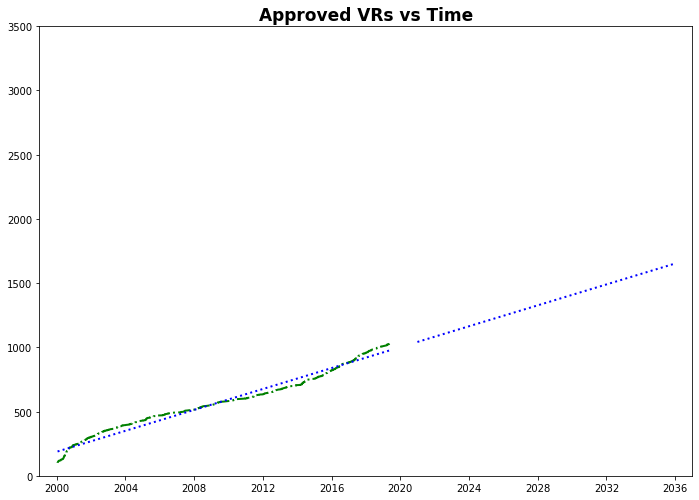

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax.set_xlim([dt.date(1999, 1, 1), dt.date(2036, 12, 31)])
ax.set_ylim(0,3500)

plt.title('Approved VRs vs Time',fontweight='bold', fontsize='17')
plt.plot_date(df4['date'], df4['index'], fmt='-.g', linewidth=2, tz=None, xdate=True, ydate=False)

plt.plot(xdays1,p1(xdays1), color='b', linestyle='dotted', linewidth=2)
plt.plot(extt,p1(extt), color='b', linestyle='dotted', linewidth=2)

#plt.plot(xdays,p2(xdays), linestyle='dotted', color='r' )
#plt.plot(extt,p2(extt), linestyle='dashed', color='r' )

plt.show()

fig.savefig('ApprovedVsTime-longlinear.png')

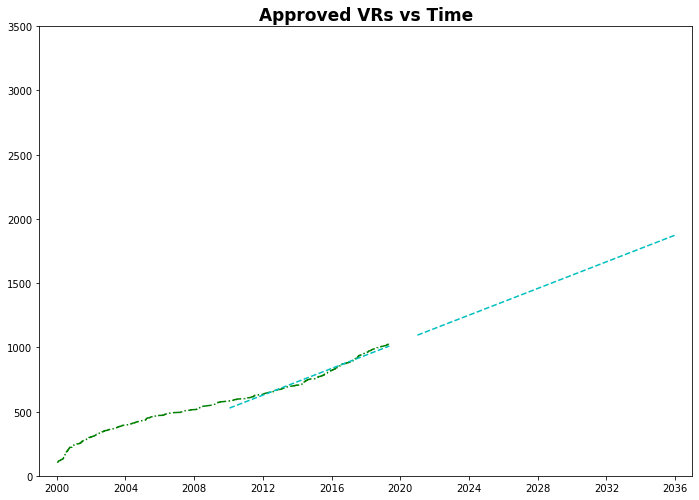

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax.set_xlim([dt.date(1999, 1, 1), dt.date(2036, 12, 31)])
ax.set_ylim(0,3500)

plt.title('Approved VRs vs Time',fontweight='bold', fontsize='17')
plt.plot_date(df4['date'], df4['index'], fmt='-.g', tz=None, xdate=True, ydate=False)

#plt.plot(xdays,p1(xdays), color='b', linestyle='dotted' )
#plt.plot(extt,p1(extt), color='b', linestyle='dotted' )

plt.plot(xdays2,p2(xdays2), color='c', linestyle='dashed' )
plt.plot(extt,p2(extt), color='c', linestyle='dashed' )

plt.show()

fig.savefig('ApprovedVsTime-linear.png')

In [11]:
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)

# ax.set_xlim([dt.date(1999, 1, 1), dt.date(2036, 12, 31)])
# ax.set_ylim(0,3500)

# plt.title('Approved VRBOs vs Time',fontweight='bold', fontsize='17')
# plt.plot_date(df4['date'], df4['index'], fmt='-.g', tz=None, xdate=True, ydate=False)

# plt.plot(xdays1,p1(xdays1), color='b', linestyle='dotted' )
# plt.plot(extt,p1(extt), color='b', linestyle='dotted' )

# plt.plot(xdays2,p2(xdays2), color='c', linestyle='dashed' )
# plt.plot(extt,p2(extt), color='c', linestyle='dashed' )

# plt.show()

# fig.savefig('ApprovedVsTimeD.png')

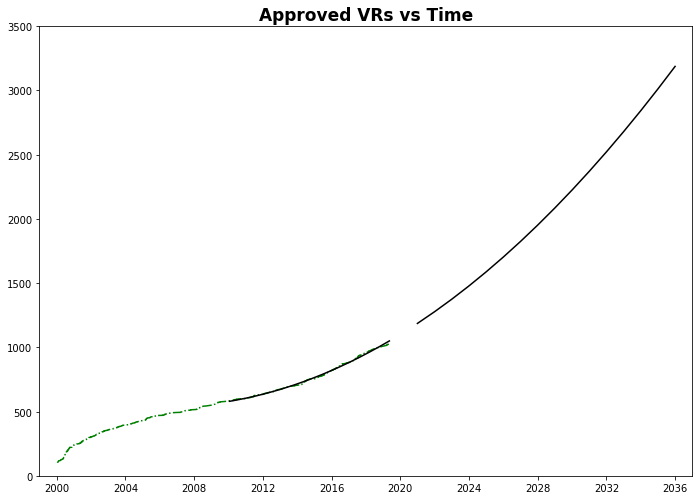

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax.set_xlim([dt.date(1999, 1, 1), dt.date(2036, 12, 31)])
ax.set_ylim(0,3500)

plt.title('Approved VRs vs Time',fontweight='bold', fontsize='17')
plt.plot_date(df4['date'], df4['index'], fmt='-.g', tz=None, xdate=True, ydate=False)

#plt.plot(xdays1,p1(xdays1), color='b', linestyle='dotted' )
#plt.plot(extt,p1(extt), color='b', linestyle='dotted' )

#plt.plot(xdays2,p2(xdays2), color='r', linestyle='dashed' )
#plt.plot(extt,p2(extt), color='r', linestyle='dashed' )

plt.plot(xdays2,p3(xdays2), color='k', linestyle='solid' )
plt.plot(extt,p3(extt), color='k', linestyle='solid' )

plt.show()

fig.savefig('ApprovedVsTime-poly.png')

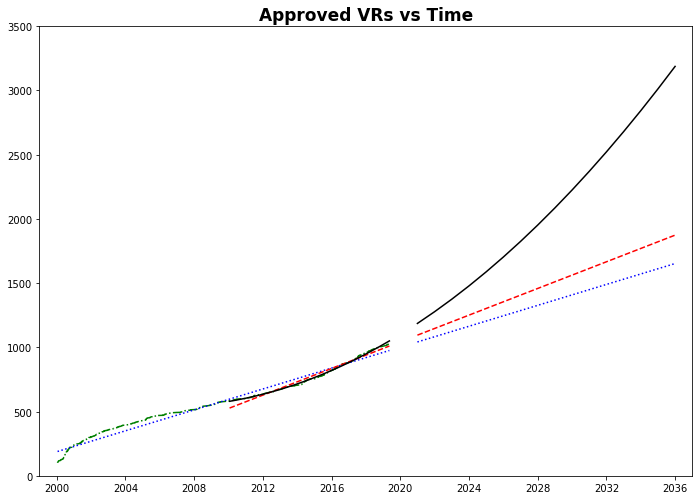

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax.set_xlim([dt.date(1999, 1, 1), dt.date(2036, 12, 31)])
ax.set_ylim(0,3500)

plt.title('Approved VRs vs Time',fontweight='bold', fontsize='17')
plt.plot_date(df4['date'], df4['index'], fmt='-.g', tz=None, xdate=True, ydate=False)

plt.plot(xdays1,p1(xdays1), color='b', linestyle='dotted' )
plt.plot(extt,p1(extt), color='b', linestyle='dotted' )

plt.plot(xdays2,p2(xdays2), color='r', linestyle='dashed' )
plt.plot(extt,p2(extt), color='r', linestyle='dashed' )

plt.plot(xdays2,p3(xdays2), color='k', linestyle='solid' )
plt.plot(extt,p3(extt), color='k', linestyle='solid' )

plt.show()

fig.savefig('ApprovedVsTime-allfits.png')